In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data Files and store into Pandas Data Frames
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data_complete = pd.merge(city_data, ride_data, how="left", on=["city", "city"])
#city_ride_data_complete.head()

#Reorder columns  #df = df[['x', 'y', 'a', 'b']]
city_ride_data_complete = city_ride_data_complete[['city','date','fare','ride_id','driver_count','type']]

#Rename to reduce typing
crd_comp = city_ride_data_complete

# Display the data table for preview
crd_comp.head()


,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [2]:
## Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

# Grouped our complete data frame by school name 
grouped_city = crd_comp.groupby(['city'])
# Calculate the average fare per city
avg_fare_per_city = grouped_city['fare'].mean()
# Calculate the total rides for each city
t_rides_per_city = grouped_city['ride_id'].count()
# Calculate total number of drivers for each city
num_drivers_per_city = grouped_city['driver_count'].first()
# City Type
city_type = grouped_city['type'].first()

# Create a dataframe to hold the above results
city={
    'Average Fare': avg_fare_per_city,
    'Total Rides':t_rides_per_city,
    'Total Drivers': num_drivers_per_city,
    'City Type': city_type,    
}
city_summary = pd.DataFrame(city)
# Display the data table for preview
city_summary.head()


,Average Fare,Total Rides,Total Drivers,City Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

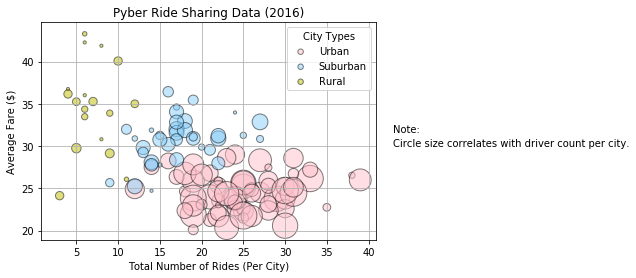

In [3]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

#Data source
ctyps = ['Urban','Suburban','Rural']
for x in ctyps:
    filtered_city_summary = city_summary[city_summary['City Type']==x]
    x = filtered_city_summary['Total Rides']
    y = filtered_city_summary['Average Fare']
    z = filtered_city_summary['Total Drivers']
    #for color per city type:
    c = np.where(filtered_city_summary["City Type"]=='Urban','pink', 
             (np.where(filtered_city_summary['City Type']=='Suburban','lightskyblue', 'y')))
    plt.scatter(x, y, s=z*10, alpha=0.5, facecolors= c, edgecolors="black" )

# Adding grid, title, and labels
plt.grid(True)
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Adding note on right hand side
textstr = ('Note:')
plt.text(.94, 0.5, textstr, fontsize=10, transform=plt.gcf().transFigure)
textstr = ('Circle size correlates with driver count per city.')
plt.text(.94, 0.45, textstr, fontsize=10, transform=plt.gcf().transFigure)

# Create a legend for our chart
lgnd = plt.legend(['Urban', 'Suburban', 'Rural'], loc=1, title="City Types", scatterpoints=1,ncol=1)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Save bubble plot and added bbox to print without having image cut off
plt.savefig('BubblePlotOfRideSharingData.png', bbox_inches="tight")

# Show bubble plot
plt.show()


## Total Fares by City Type

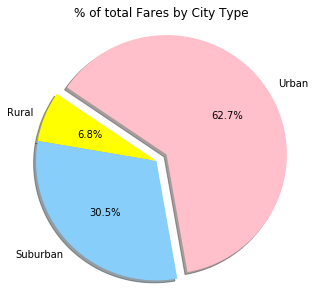

In [4]:
# Calculate Type Percents
# Total Fare
# % City Type
# Show Figure

# Grouping by city type
type_data = crd_comp.groupby(['type'])

# Total Fare
total_fare = crd_comp['fare'].sum()
total_fare

# Sum per type
sum_per_type = type_data['fare'].sum()
sum_per_type

percent_type = (sum_per_type/total_fare)*100
percent_type

df = pd.DataFrame({'percent': percent_type},index=['Urban', 'Rural','Suburban'])

# The colors of each section of the pie chart
colors = ["pink", "yellow", 'lightskyblue']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plot = df.plot.pie(y='percent', figsize=(5, 5), autopct='%1.1f%%', title='% of total Fares by City Type', 
                   explode=explode, colors=colors, startangle=280, shadow=True, legend=False, label=' ')
plt.axis('auto')

# Save figure
plt.savefig('PiePlotOfTotalFareByCityType.png')

# Show figure
plt.show()


## Total Rides by City Type

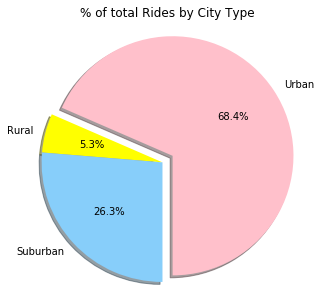

In [5]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure
# Show Figure

# Total Fare
total_rides = crd_comp['ride_id'].count()
total_rides

# rides per type
ride_per_type = type_data['ride_id'].count()
ride_per_type

percent_ride = (ride_per_type/total_rides)*100
percent_ride

df = pd.DataFrame({'percent': percent_ride},index=['Urban', 'Rural','Suburban'])

# The colors of each section of the pie chart
colors = ["pink", "yellow", 'lightskyblue']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plot = df.plot.pie(y='percent', figsize=(5, 5), autopct='%1.1f%%', title='% of total Rides by City Type', 
                   explode=explode, colors=colors, startangle=270, shadow=True, legend=False, label=' ')
plt.axis('auto')

# Save figure
plt.savefig('PiePlotOfTotalRidesByCityType.png')

# Show figure
plt.show()


## Total Drivers by City Type

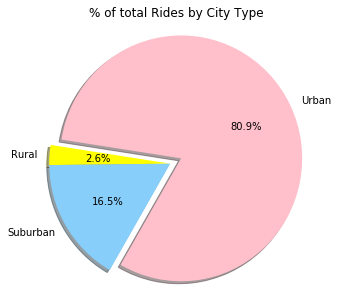

In [6]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure
# Show Figure

# City summary grouped by city type
type_data = city_summary.groupby(['City Type'])

# Total Fare
total_drivers = city_summary['Total Drivers'].sum()

# rides per type
drivers_per_type = type_data['Total Drivers'].sum()

# percent of drivers per city type
percent_drivers = (drivers_per_type/total_drivers)*100

# Plotting percent of drivers per city type
df = pd.DataFrame({'percent': percent_drivers},index=['Urban', 'Rural','Suburban'])

# The colors of each section of the pie chart
colors = ["pink", "yellow", 'lightskyblue']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Plot pie chart
plot = df.plot.pie(y='percent', figsize=(5, 5), autopct='%1.1f%%', title='% of total Rides by City Type', 
                   explode=explode, colors=colors, startangle=240, shadow=True, legend=False, label=' ')
plt.axis('auto')

# Save figure
plt.savefig('PiePlotOfTotalDriverByCityType.png')

# Plot figure
plt.show()
